# Task 06  - Machine Learning 2
##   Extract objects from background using Thresholding techniques.


Thresholding is the **binarization** of an image
- Convert a grayscale image to a binary image, where the pixels are either 0 or 255

A **simple thresholding example** would be as follows:
- selecting a pixel value p
- Setting all pixel intensities less than p to zero
- Setting all pixel values greater than p to 255

In this way, we are able to create a **binary representation** of the image

Normally, we use thresholding to focus on objects or **areas of particular interest** in an image

### Types of Thresholding
- Simple Thresholding
- Adaptive Thresholding
- Otsu and Riddler-Calvard Thresholding
- Watershed

## SIMPLE THRESHOLDING

Applying simple thresholding methods requires **human intervention**
- Specify a threshold value **T**
- All pixel intensities **below** T are set to **0**
- All pixel intensities **greater** than T are set to **255**

**Inverse Binarization**

- Setting all pixels **below** T to **255**
- Setting all pixel intensities **greater** than T to **0**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Threshold the image
- Display the image

#### Import the necessary libraries

In [1]:
import cv2
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

#### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
    
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [3]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "1.jpg"
}

#### Load the image

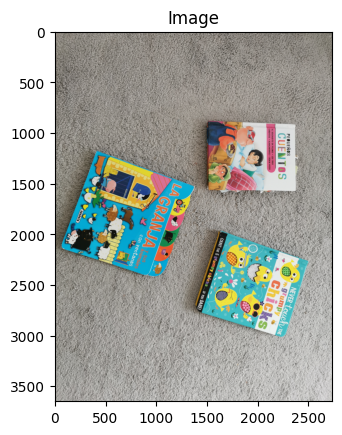

In [4]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

**Resize the Image**

In [5]:
# inter = cv2.INTER_AREA
# r = 0.15
# dim  = (int(image.shape[1]*r),int(image.shape[0]*r))
# image = cv2.resize(image, dim, interpolation = inter)

#### Convert the image into grayscale

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [7]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.threshold( )**
    - image
    - threshold value **T** (manual setting)
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Thresholding method
        - **THRESH_BINARY**
            - Pixel values greater than T are set to maximum value M
    - Returns
        - T (manually set)
        - thresholded image

In [8]:
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
# (T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_TRUNC)
# (T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_TOZERO)
# (T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_TOZERO_INV)

#### Display the thresholded image

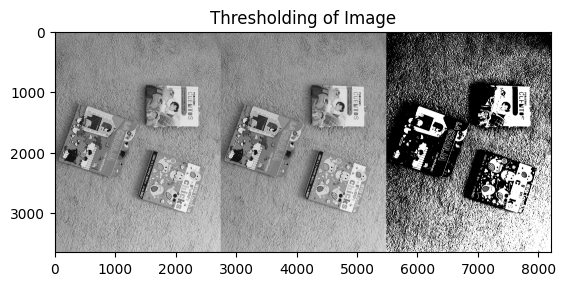

In [9]:
# cv2.imshow("Thresholding of Image", np.hstack([gray, blurred, thresh]))
# cv2.waitKey(0)

plt_imshow("Thresholding of Image", np.hstack([gray, blurred, thresh]))

### Inverse Thresholding

In [10]:
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)

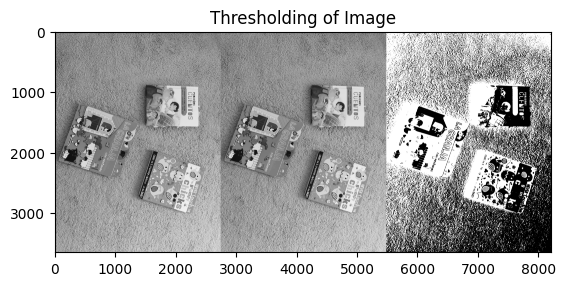

In [11]:
plt_imshow("Thresholding of Image", np.hstack([gray, blurred, threshInv]))

### Extract the foreground

In [12]:
foreground = cv2.bitwise_and(image, image, mask = threshInv)

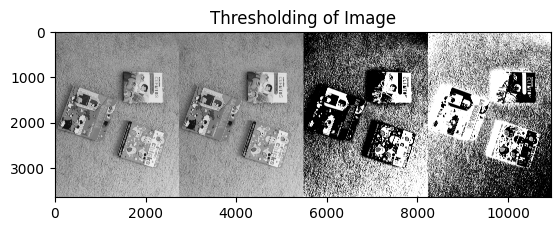

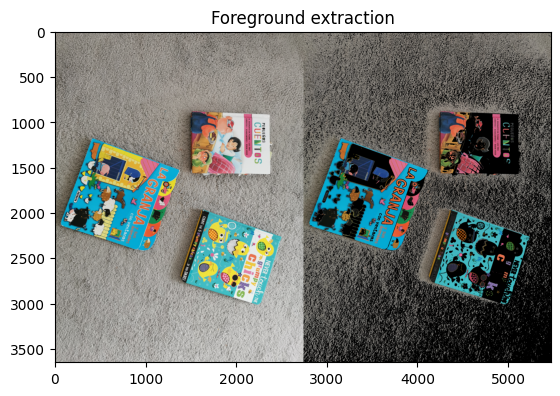

In [13]:
plt_imshow("Thresholding of Image", np.hstack([gray, blurred, thresh, threshInv]))
plt_imshow("Foreground extraction", np.hstack([image, foreground]))

## ADAPTIVE THRESHOLDING

Drawbacks of Previous method
- Manually supply Threshold Value T
- Requires lots of experiments with different T

**Solution**: Adaptive Thresholding

Consider **small neighbors** of pixels and then find an **optimal threshold value** T for each neighbor

Useful
- High ranges of pixel intensities in the image
- Optimal value of T may change for different parts of the image

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Adaptive Threshold the image
- Display the image

#### Import the libraries

In [14]:
# import cv2
# import numpy as np

#### Load the image

In [15]:
# image = cv2.imread("1.jpg")

In [16]:
# image = cv2.resize(image, dim, interpolation = inter)

#### Convert the image into grayscale

In [17]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Blur the image

In [18]:
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### Threshold the image
- Use **cv2.adaptiveThreshold( )**
    - image
    - Maximum value **M** to be set during thresholding
        - If a pixel intensity p is greater than T, it is set to M
        - If a pixel intensity p is lesser than T, it is set to 0
    - Method to compute the thresholding
        - **ADAPTIVE_THRESH_MEAN_C**
            - Compute the mean of the neighborhood of pixels and treat it as T
        - **ADAPTIVE_THRESH_GAUSSIAN_C**
            - Compute the Weighted mean of the neighborhood of pixels and treat it as T
    - Thresholding Method
        - **THRESH_BINARY_INV**
            - If any pixel greater than T in the neighborhood should be set to 255
            - If any pixel less than T, set to 0
    - Neighborhood size
        - Smaller square region for consideration to compute threshold
    - C
        - Integer that is subtracted from the mean allowing us to fine-tune our thresholding
    - Returns
        - T (manually set)
        - thresholded image

In [19]:
thresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               11, 
                               4
)

#### Display the Thresholded image

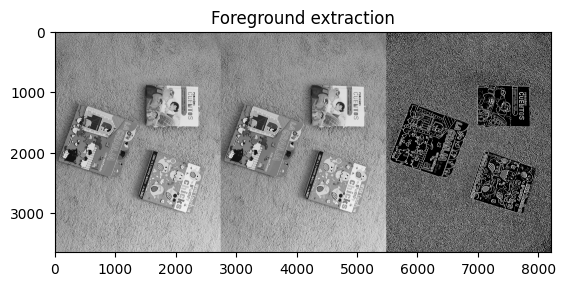

In [20]:
plt_imshow("Foreground extraction", np.hstack([gray, blurred, thresh]))

### Try Gaussian Thresholding

In [21]:
gaussianthresh = cv2.adaptiveThreshold(blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               15, 
                               3
)

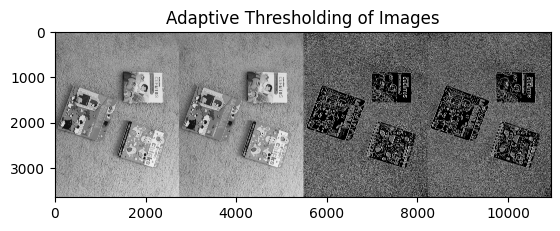

In [22]:
# cv2.imshow("Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
# cv2.waitKey(0)
plt_imshow("Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))

### Extract Foreground

In [23]:
foregroundgaussian = cv2.bitwise_and(image, image, mask = gaussianthresh)

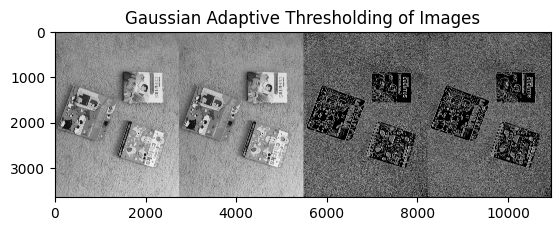

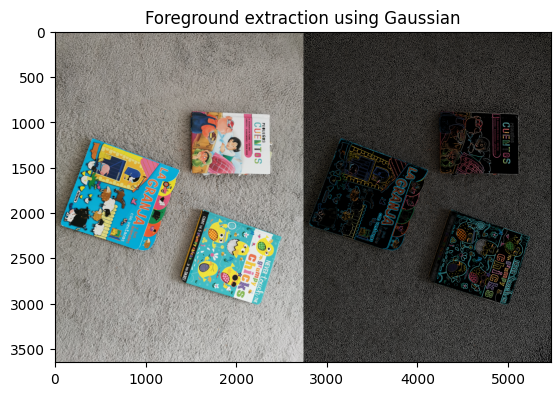

In [24]:
plt_imshow("Gaussian Adaptive Thresholding of Images", np.hstack([gray, blurred, thresh, gaussianthresh]))
plt_imshow("Foreground extraction using Gaussian", np.hstack([image, foregroundgaussian]))

## OTSU THRESHOLDING

Otsu’s method assumes there are **two peaks** in the grayscale histogram of the image
It then tries to find an optimal value to **separate** these two peaks – thus our value of T

Note: Please install **mahotas**

### Steps
- Import the libraries
- Load the image
- Convert the image into grayscale
- Blur the image (optional)
- Otsu Threshold the image
- Display the image

#### Import the ncessary libraries

In [25]:
# !pip install mahotas

### numpy has to be upgraded after installing mahotas
https://github.com/freqtrade/freqtrade/issues/4281

In [26]:
# !pip install numpy --upgrade --user
# numpy has to be upgraded after installing mahotas
# https://github.com/freqtrade/freqtrade/issues/4281
# !pip install mahotas

In [27]:
import cv2
import numpy as np
import mahotas

#### Load the image

In [28]:
# image = cv2.imread("1.jpg")

In [29]:
# image = cv2.resize(image, dim, interpolation = inter)

#### Convert the image into grayscale

In [30]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [31]:
# image = cv2.resize(image, dim, interpolation = inter)

#### Blur the image

In [32]:
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#### OTSU Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**otsu**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

##### Find the optimal threshold of the image - Use OTSU

In [33]:
T = mahotas.thresholding.otsu(blurred)

##### What's the value of T?

In [34]:
T

145

#### Apply threshold
##### Copy the image

In [35]:
thresh = image.copy()

##### Set to white pixel if pixel intensity greater than T

In [36]:
thresh[thresh > T] = 255

##### Set to black pixel if pixel intensity less than 255

In [37]:
thresh[thresh < 255] = 0

##### Invert the thresholding
- Use cv2.bitwise_not

In [38]:
thresh = cv2.bitwise_not(thresh)

##### Display the image

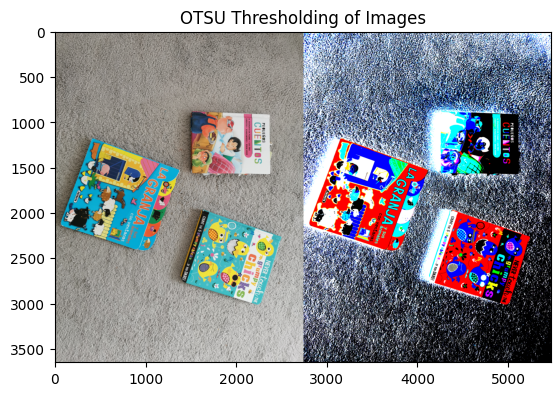

In [39]:
plt_imshow("OTSU Thresholding of Images", np.hstack([image, thresh]))

## RIDDLER-CALVARD THRESHOLDING

#### RC Thresholding of image
- Find the optimal threshold for the image
    - Use mahotas.thresholding.**rc**
- Apply threshold
    - Copy the image
    - Set to white pixel if pixel intensity greater than T
    - Set to black pixel if pixel intensity less than 255
    - Invert the thresholding
        - Use **cv2.bitwise_not**

In [40]:
T_RC = mahotas.thresholding.rc(blurred)

In [41]:
thresh_RC = image.copy()

In [42]:
thresh_RC[thresh_RC > T_RC] = 255

In [43]:
thresh_RC[thresh_RC < 255] = 0

In [44]:
thresh_RC = cv2.bitwise_not(thresh_RC)

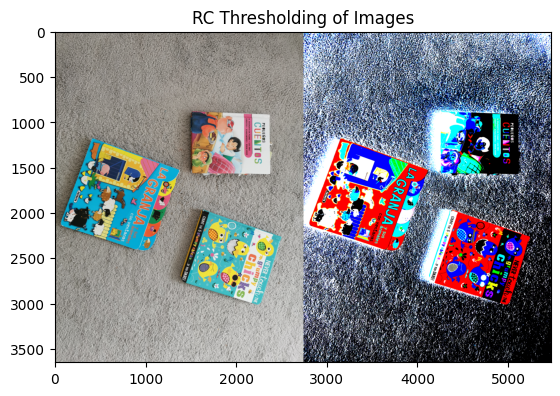

In [45]:
plt_imshow("RC Thresholding of Images", np.hstack([image, thresh_RC]))